In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
num_orders = 1000
products = ["Laptop", "Phone", "Tablet", "Monitor", "Keyboard"]
regions = ["North", "South", "East", "West"]

data = {
    "order_id": np.arange(1, num_orders + 1),
    "product": np.random.choice(products, num_orders),
    "quantity": np.random.randint(1, 10, num_orders),
    "price": np.random.uniform(100, 2000, num_orders).round(2),
    "date": [datetime.today() - timedelta(days=np.random.randint(1, 365)) for _ in range(num_orders)],
    "region": np.random.choice(regions, num_orders)
}

df = pd.DataFrame(data)
df.to_csv("sales_data.csv", index=False)

In [3]:
df

,order_id,product,quantity,price,date,region
0,1,Phone,6,593.86,2024-03-28 18:10:38.994363,South
1,2,Phone,9,1913.59,2024-04-02 18:10:38.994363,East
2,3,Monitor,7,1669.81,2024-03-30 18:10:38.994363,North
3,4,Keyboard,8,1531.39,2024-08-04 18:10:38.994363,South
4,5,Phone,8,1272.26,2024-02-16 18:10:38.994363,East
...,...,...,...,...,...,...
995,996,Laptop,9,307.56,2025-01-06 18:10:38.998366,North
996,997,Phone,1,1779.65,2024-03-03 18:10:38.998366,West
997,998,Monitor,7,280.40,2024-11-16 18:10:38.998366,South
998,999,Keyboard,1,320.39,2024-10-15 18:10:38.998366,North


In [4]:
df.drop_duplicates(inplace=True)

In [6]:
df.head()

,order_id,product,quantity,price,date,region
0,1,Phone,6,593.86,2024-03-28 18:10:38.994363,South
1,2,Phone,9,1913.59,2024-04-02 18:10:38.994363,East
2,3,Monitor,7,1669.81,2024-03-30 18:10:38.994363,North
3,4,Keyboard,8,1531.39,2024-08-04 18:10:38.994363,South
4,5,Phone,8,1272.26,2024-02-16 18:10:38.994363,East


In [7]:
df["Total_Revenue"] = df["quantity"] * df["price"]
df.head(2)

,order_id,product,quantity,price,date,region,Total_Revenue
0,1,Phone,6,593.86,2024-03-28 18:10:38.994363,South,3563.16
1,2,Phone,9,1913.59,2024-04-02 18:10:38.994363,East,17222.31


In [11]:
top_selling_products = df.groupby(["product"])["Total_Revenue"].sum().sort_values(ascending=False)
top_product = top_selling_products.idxmax()
print(f"Top selling product is: {top_product}")

Top selling product is: Keyboard


In [14]:
df['Month'] = df["date"].dt.to_period("M")

Text(0.5, 1.0, 'Monthly Revenue')

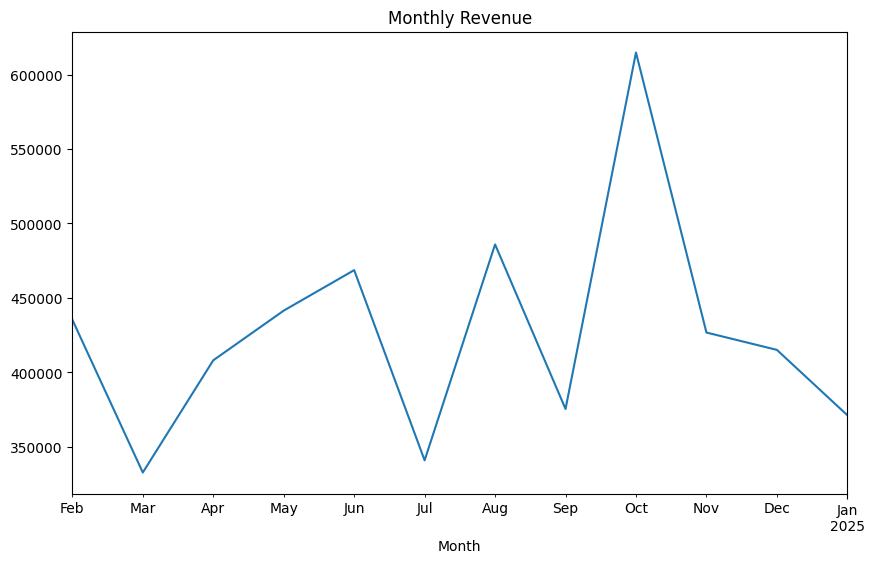

In [19]:
plt.figure(figsize=(10,6))
df.groupby("Month")["Total_Revenue"].sum().plot()
plt.title("Monthly Revenue")

In [24]:
data = {
    'order' : [1,2,3,4,5],
    'cust' : [1,1,1,2,2]
}
dfac = pd.DataFrame(data)
dfac

,order,cust
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2


In [45]:
a = dfac.groupby('cust')['order'].count().reset_index().sort_values(by="order", ascending=False)



In [57]:
type(a[["cust"]].iloc[[0]])

pandas.core.frame.DataFrame

In [62]:
d = dfac.groupby('cust', as_index=False)["order"].count()
d.nlargest(1, "order")[["cust"]]

,cust
0,1
